In [11]:
# Carregamento de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
# Carregamento dos dados
df = pd.read_csv("heart.csv", encoding='utf-8')

# Visualizar as primeiras linhas
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [13]:
cat_cols = df.select_dtypes(include='object').columns

# Aplicar One-Hot Enconding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Mostrar as novas colunas após a codificação
df_encoded.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
5,39,120,339,0,170,0.0,0,True,False,True,False,True,False,False,False,True
6,45,130,237,0,170,0.0,0,False,True,False,False,True,False,False,False,True
7,54,110,208,0,142,0.0,0,True,True,False,False,True,False,False,False,True
8,37,140,207,0,130,1.5,1,True,False,False,False,True,False,True,True,False
9,48,120,284,0,120,0.0,0,False,True,False,False,True,False,False,False,True


In [14]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

print("Features: ", X.columns.to_list())
print("Target: ", y.name)

Features:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
Target:  HeartDisease


Melhor k: 39
Melhor random_state: 132
Melhor acurácia: 0.9457


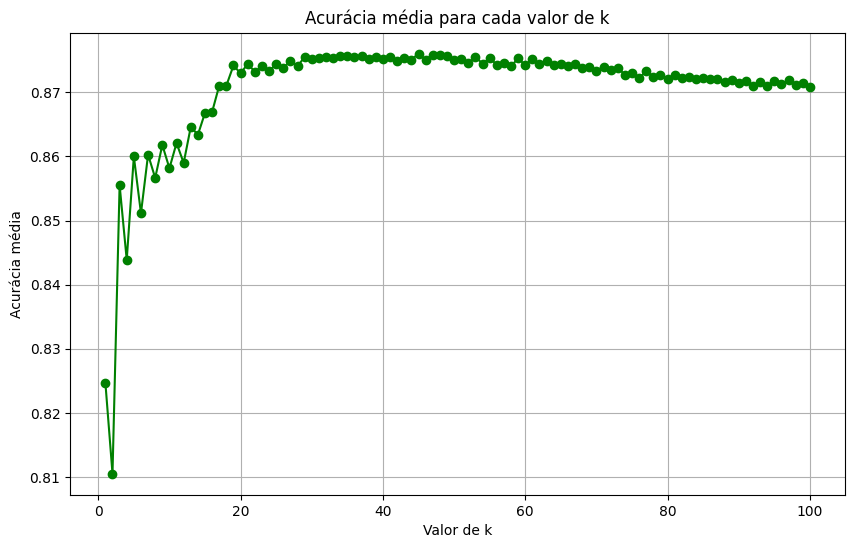

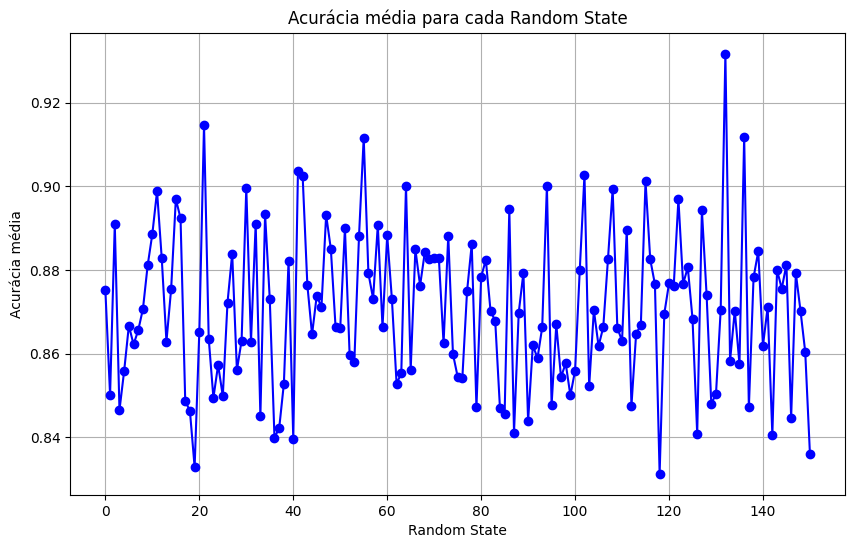

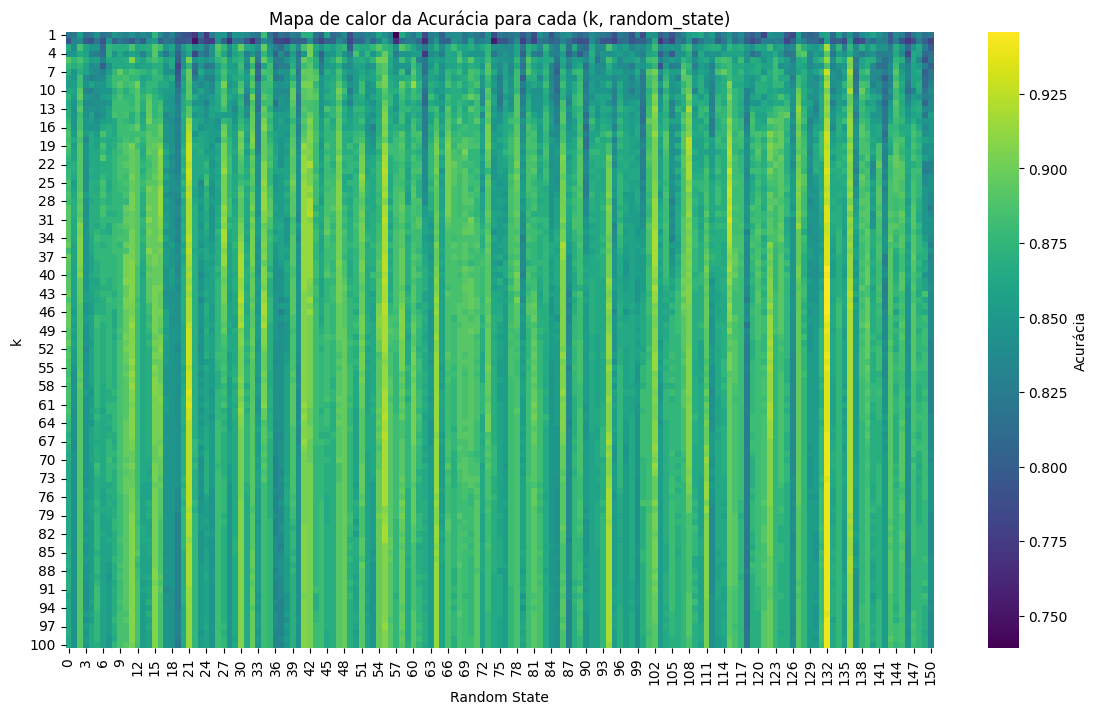

In [15]:
best_k = 0
best_seed = 0
best_accuracy = 0

results = []

k_range = range(1, 101)  # Testa k de 1 a 50
random_state_range = range(0, 151)  # Testa random_state de 0 a 150

for k in k_range:
    for rs in random_state_range:
        # Split
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=rs, stratify=y)
        
        # Padronização
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Modelo
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_val_scaled)
        
        accuracy = accuracy_score(y_val, y_pred)
        
        # Guarda o resultado
        results.append({'k': k, 'random_state': rs, 'accuracy': accuracy})
        
        # Atualiza o melhor
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_seed = rs

# Exibe o melhor
print(f"Melhor k: {best_k}")
print(f"Melhor random_state: {best_seed}")
print(f"Melhor acurácia: {best_accuracy:.4f}")

# ----------------------------
# Preparar dados para gráficos
# ----------------------------

# Convertendo resultados para numpy arrays
k_values = np.array([r['k'] for r in results])
random_states = np.array([r['random_state'] for r in results])
accuracies = np.array([r['accuracy'] for r in results])

# ----------------------------
# Gráfico 1: Acurácia por k (média sobre random_states)
# ----------------------------
mean_accuracy_per_k = [np.mean(accuracies[k_values == k]) for k in k_range]

plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_accuracy_per_k, marker='o', color='g')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia média')
plt.title('Acurácia média para cada valor de k')
plt.grid(True)
plt.show()

# ----------------------------
# Gráfico 2: Acurácia por random_state (média sobre k)
# ----------------------------
mean_accuracy_per_rs = [np.mean(accuracies[random_states == rs]) for rs in random_state_range]

plt.figure(figsize=(10, 6))
plt.plot(random_state_range, mean_accuracy_per_rs, marker='o', color='b')
plt.xlabel('Random State')
plt.ylabel('Acurácia média')
plt.title('Acurácia média para cada Random State')
plt.grid(True)
plt.show()

# ----------------------------
# Gráfico 3: Mapa de calor das acurácias para cada (k, random_state)
# ----------------------------

# Criar matriz de acurácia
heatmap_data = pd.DataFrame(index=k_range, columns=random_state_range)

for r in results:
    heatmap_data.at[r['k'], r['random_state']] = r['accuracy']

heatmap_data = heatmap_data.astype(float)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Acurácia'})
plt.xlabel('Random State')
plt.ylabel('k')
plt.title('Mapa de calor da Acurácia para cada (k, random_state)')
plt.show()
